### This only works in the classic Notebook
Click on Help ->  

In [1]:
import ipyvolume
import numpy

from deepracer.tracks import TrackIO, Track

from deepracer.logs import \
    AnalysisUtils as au, \
    SimulationLogsIO as slio, \
    EvaluationUtils as eu, \
    PlottingUtils as pu,\
    NewRewardUtils as nr \

tu = TrackIO(base_path='../tracks')
track: Track = tu.load_track("reinvent_base")

fname = '../logs/evaluation-simulation-logs-w6.log'
df = slio.load_pandas(fname)
df = df.rename(columns={'track_len':'track_length'}) 
df['track_width'] = 0.76
df.head()

Loaded 71 waypoints


,iteration,episode,steps,x,y,yaw,steer,throttle,action,reward,done,on_track,progress,closest_waypoint,track_length,timestamp,track_width
0,1,4,422,2.6503,0.7433,5.8835,-30.0,0.67,1.0,0.5,0,True,98.5304,69,17.67,1592268617.1177576,0.76
1,1,4,423,2.6899,0.7504,6.9530,-30.0,0.33,0.0,0.5,0,True,98.7545,69,17.67,1592268617.1857002,0.76
2,1,4,424,2.7273,0.7558,7.5674,-30.0,0.33,0.0,0.5,0,True,98.9661,69,17.67,1592268617.2545586,0.76
3,1,4,425,2.7517,0.7583,7.6323,0.0,0.33,3.0,0.5,0,True,99.1042,69,17.67,1592268617.319684,0.76
4,1,4,426,2.7754,0.7602,7.1388,30.0,0.67,7.0,0.5,0,True,99.2383,69,17.67,1592268617.388125,0.76


In [2]:
xmax, ymax = df[['x','y']].max().values
xx,yy = numpy.meshgrid(numpy.linspace(0,xmax),numpy.linspace(0,ymax))

In [3]:
x,y = xx.reshape(-1), yy.reshape(-1)
z = numpy.zeros_like(x)

In [4]:
xin,yin = track.inner_border.T
xctr,yctr = track.center_line.T
xout,yout = track.outer_border.T
zline = numpy.zeros_like(xin)

In [5]:
ipyvolume.figure()
ipyvolume.pylab.plot(xin,yin,zline,'black')
ipyvolume.pylab.plot(xout,yout,zline,'black')
ipyvolume.pylab.plot(xctr,yctr,zline,'yellow')
ipyvolume.show()

In [6]:
ipyvolume.figure()
X,Y,rew = df[['x','y','reward']].values.T
ipyvolume.quickscatter(X,Y,rew,marker='sphere',size=1)
ipyvolume.show()

In [ ]:
import sys
sys.path.append('../')
from reward import AWSReward, RewardFactory
factory = RewardFactory(AWSReward)
factory.calculate_all_rewards(df,track.center_line,nr.df_to_params,factory.DEFAULT_MISSING_PARAMETERS)

In [9]:
nr.df_to_params(df.iloc[0],track.center_line)

{'x': 2.6503,
 'y': 0.7433,
 'speed': 0.67,
 'steps': 422,
 'progress': 98.5304,
 'heading': 337.27070063694265,
 'closest_waypoints': [69, 70],
 'steering_angle': -1719.7452229299363,
 'waypoints': array([[2.90999528, 0.68319247],
        [3.31999523, 0.68333905],
        [3.41999522, 0.6833748 ],
        [3.63000234, 0.68344988],
        [4.18999512, 0.68365009],
        [4.50000223, 0.68376092],
        [4.54999507, 0.68377879],
        [5.32000213, 0.68405407],
        [5.42000211, 0.68408983],
        [5.78000207, 0.68421853],
        [6.28974786, 0.69214001],
        [6.46090648, 0.71230635],
        [6.51369806, 0.72102941],
        [6.70428787, 0.79959867],
        [6.83628178, 0.88170048],
        [6.99166336, 1.00626532],
        [7.11420746, 1.16932251],
        [7.16583068, 1.26342676],
        [7.28001974, 1.76283083],
        [7.27289221, 1.813237  ],
        [7.2659607 , 1.86225687],
        [7.10457477, 2.30148749],
        [7.01174901, 2.41926029],
        [6.72727371,

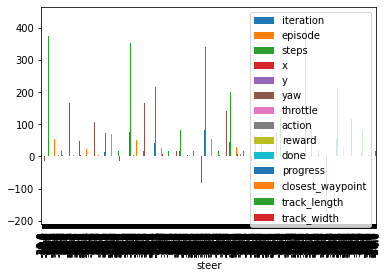

In [11]:
df.plot(kind='bar',x='steer')

In [13]:
import seaborn as sns

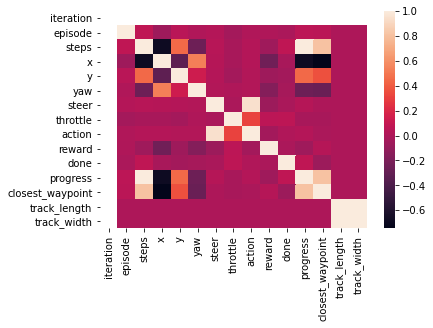

In [22]:
sns.heatmap(df.select_dtypes('number').corr())

In [107]:
agg = au.simulation_agg(df)
agg.head()

,iteration,episode,steps,start_at,progress,time,new_reward,throttle,reward,time_if_complete,reward_if_complete,quintile
0,1,0,431,69,100.0000,28.786608,260.200,0.575800,260.200,28.786609,260.200000,1st
1,1,1,210,34,48.6275,13.951000,151.103,0.629810,151.103,28.689528,310.735695,2nd
2,1,2,411,69,100.0000,27.403907,261.000,0.601557,261.000,27.403907,261.000000,3rd
3,1,3,435,69,100.0000,29.138338,263.200,0.564276,263.200,29.138338,263.200000,4th
4,1,4,430,69,100.0000,28.691986,277.000,0.569042,277.000,28.691986,277.000000,5th


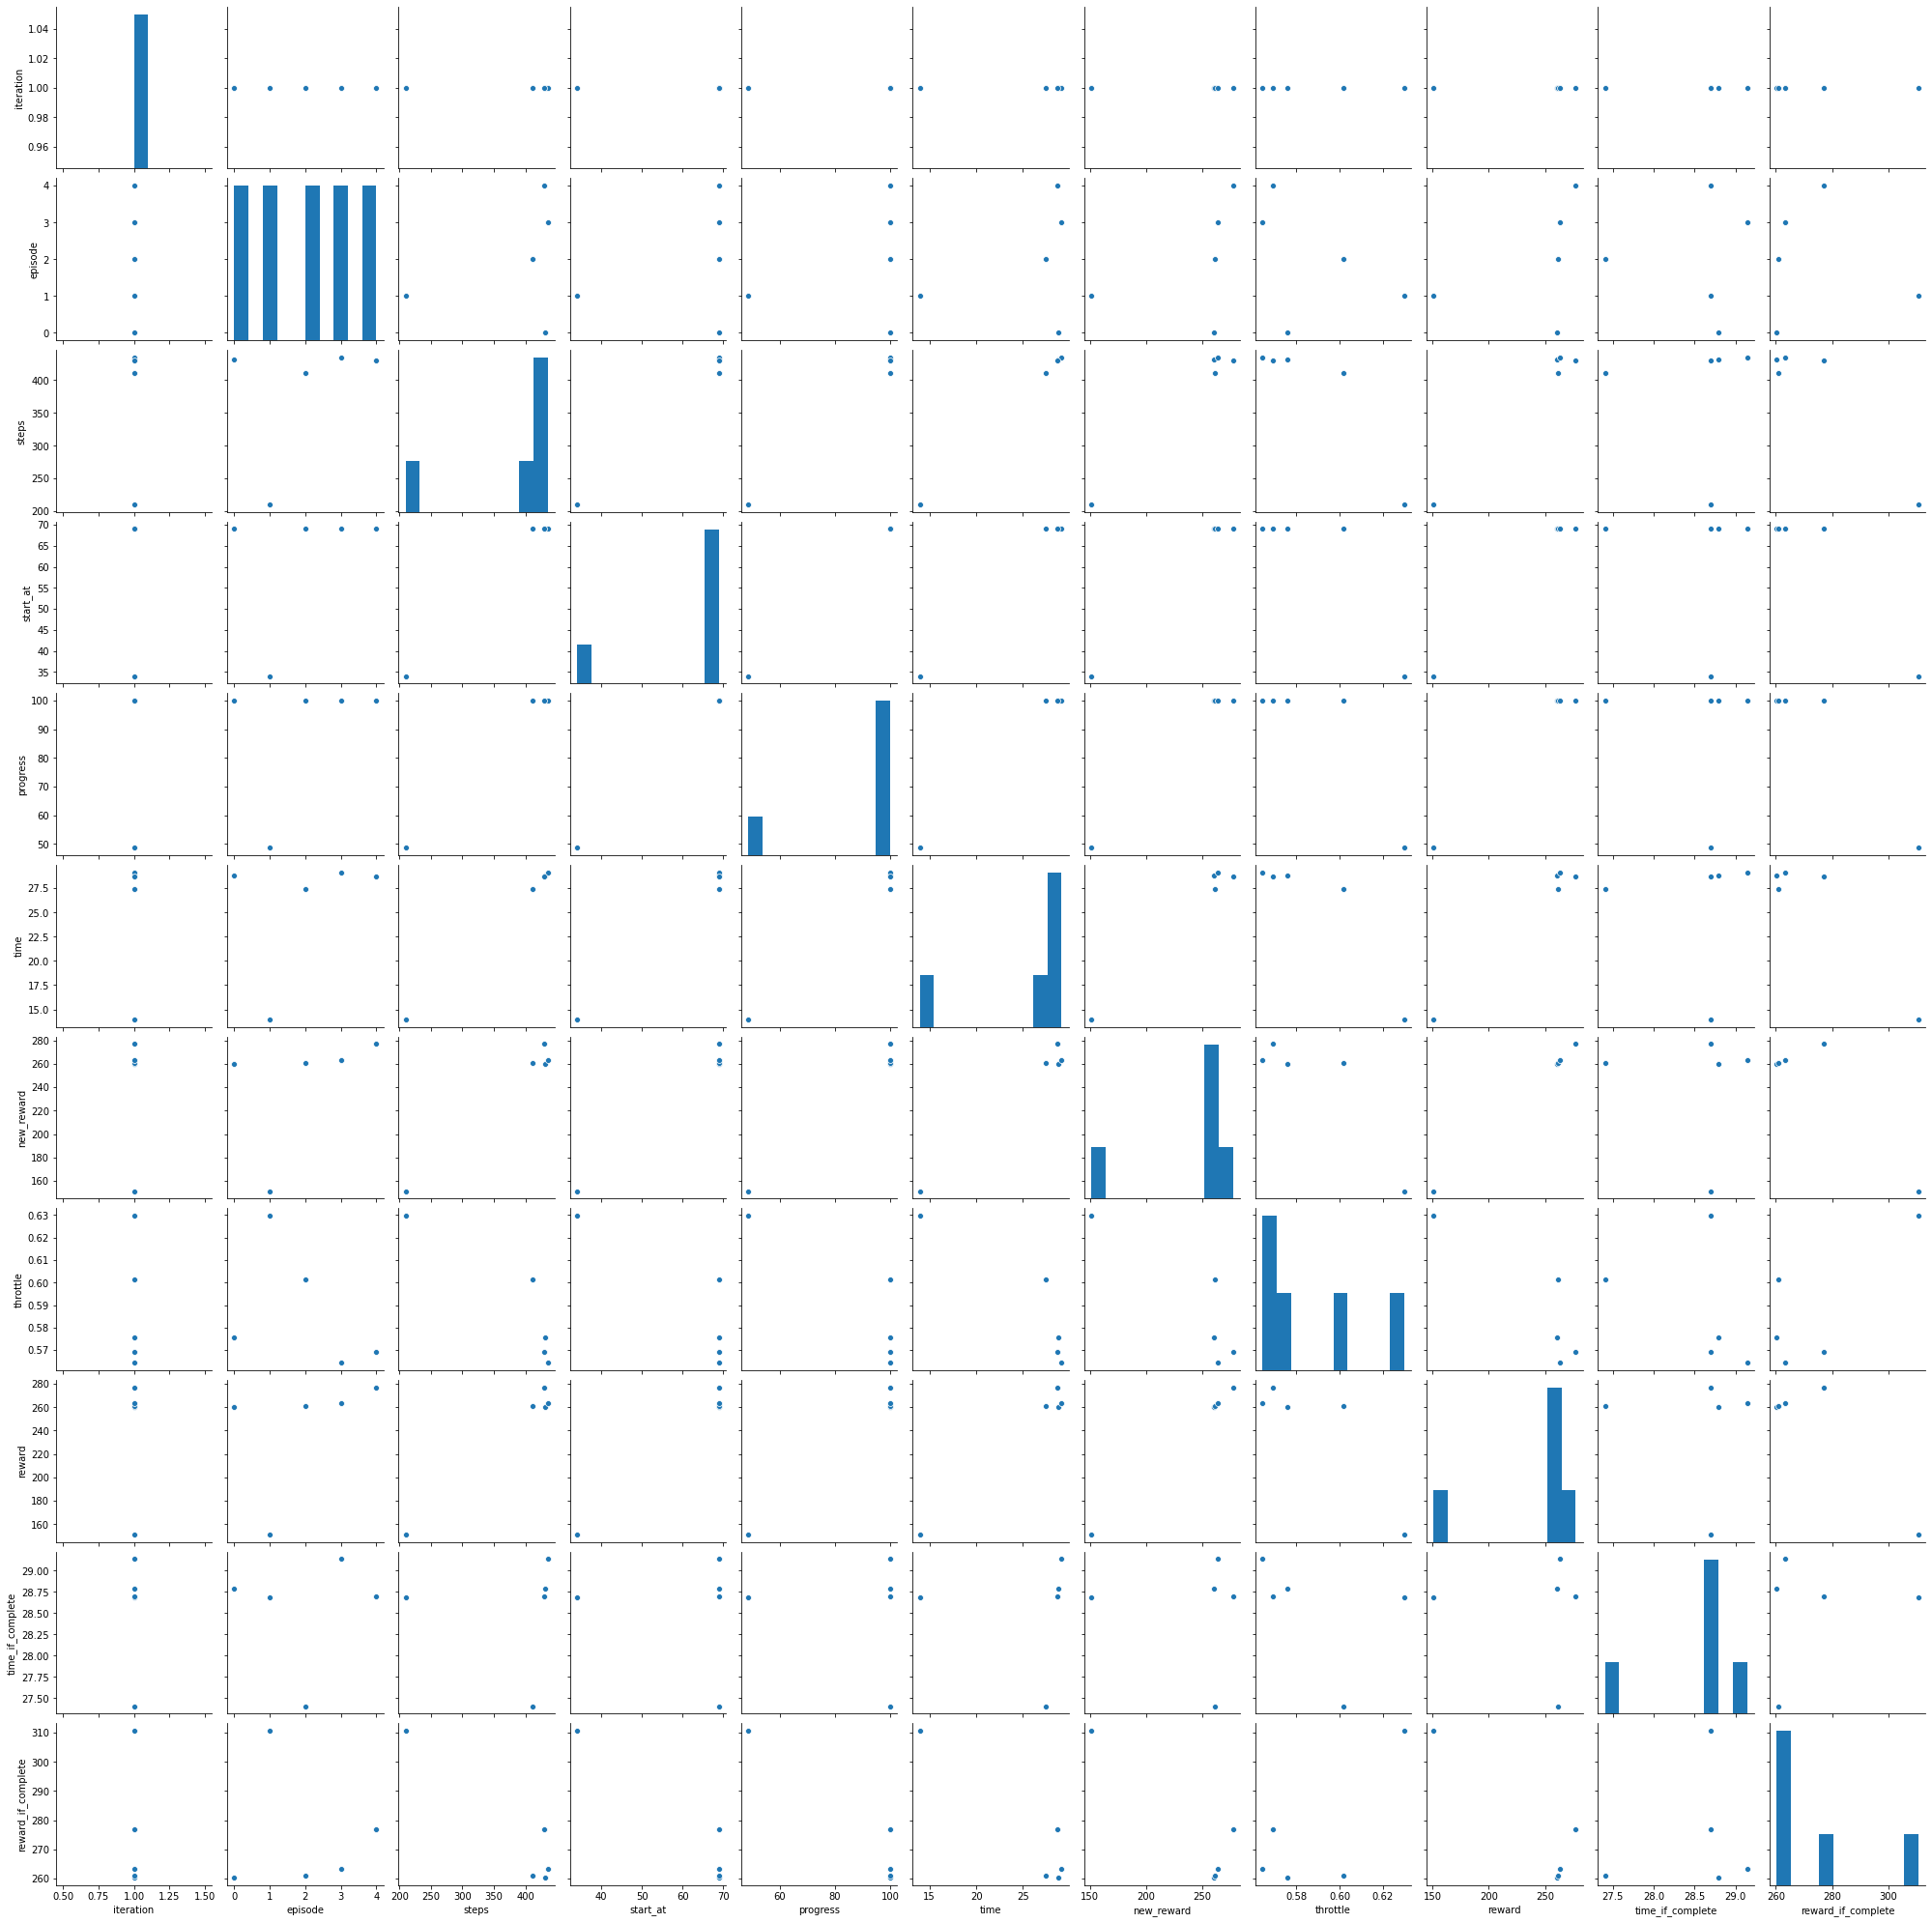

In [108]:
sns.pairplot(agg)

In [25]:
import bqplot.pyplot as blt

In [50]:
df['steer'] = df['steer'].map(lambda x: x % 180)
episode_num = 0
lap = df[df.episode==episode_num]
blt.scatter(x=lap['x'],y=lap['y'],marker='arrow',rotation=lap['steer'])
blt.show()

In [70]:
from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)

sc_x = LinearScale()
sc_y = LinearScale()
sc_e = LinearScale(min=-180.0,max=180.0)
sc_c = ColorScale(scheme='Reds')
x, y = lap['x'], lap['y']
rot = lap['yaw']
color= lap['reward']
size = lap['throttle']
def_tt = Tooltip(fields=['x', 'y','rotation'], formats=['', '.2f'])

scatter = Scatter(scales={'x': sc_x, 'y': sc_y, 'color': sc_c, 'rotation': sc_e}, 
                  x=x, y=y, rotation=rot, color=color, size=size,
                  stroke="black", default_size=50, 
                  marker='arrow', default_skew=0.5,tooltip=def_tt)

xin,yin = track.inner_border.T
xout,yout = track.outer_border.T
border_in = Lines(scales={'x': sc_x, 'y': sc_y,}, x=xin, y=yin, )
border_out = Lines(scales={'x': sc_x, 'y': sc_y,}, x=xout, y=yout, )


Figure(marks=[scatter,border_in,border_out], animation_duration=1000)

Figure(animation_duration=1000, fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Scatter(…

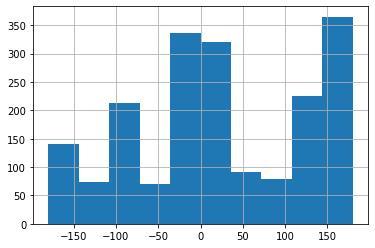

In [71]:
df.yaw.hist()

In [105]:
sc_x = LinearScale()
sc_y = LinearScale()
sc_e = LinearScale(min=-180,max=180,reverse=True)
sc_c = ColorScale(scheme='Reds')
t = numpy.linspace(0,360,90)
x, y = t,numpy.zeros_like(t)
rot = t 
color= t
size = numpy.ones_like(t)
def_tt = Tooltip(fields=['x', 'y','rotation'], formats=['', '.2f'])

scatter = Scatter(scales={'x': sc_x, 'y': sc_y, 'color': sc_c, 'rotation': sc_e}, 
                  x=x, y=y, rotation=rot, color=color, size=size,
                  stroke="black", default_size=50, 
                  marker='arrow', default_skew=0.5,tooltip=def_tt)

Figure(marks=[scatter], animation_duration=1000)

Figure(animation_duration=1000, fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Scatter(…